In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.genfromtxt('mnist_X.csv', delimiter=',')
# data
label = np.genfromtxt('mnist_label.csv', delimiter=',')

# PCA
---

In [3]:
def myPCA(X, n_component=2):
    X_mean = np.mean(X, axis=0)
#     X_std = np.std(X, axis=0)
    X_scaled = (X - X_mean)
    cov = np.cov(X_scaled.T)
    eig_vals, eig_vecs = np.linalg.eig(cov)

#     print("Eigenvals:\n{}\n".format(eig_vals))
#     print("Eigenvecs:\n{}\n".format(eig_vecs))

    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    d = np.array([eig[1].real for eig in eig_pairs[:n_component]])
    data = np.dot(X_scaled, d.T)
    return data

In [4]:
result = myPCA(data, 2)
result

array([[-4.4716249 ,  1.27013613],
       [-4.56395126,  1.53239137],
       [-2.41338402,  0.39993168],
       ...,
       [-1.84107145, -4.35032551],
       [-1.38233832, -3.3152106 ],
       [-1.1164873 , -2.90526143]])

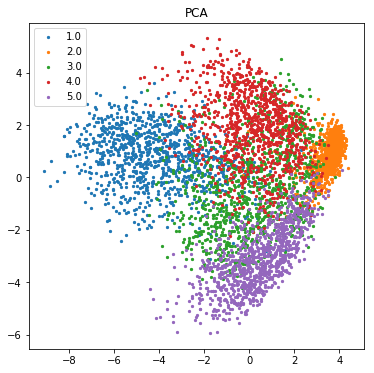

In [5]:
plt.figure(figsize=(6, 6))
plt.title("PCA")
for l in np.unique(label):
    plt.scatter(result[np.where(label == l)][:, 0], result[np.where(label == l)][:, 1], s=5, label=str(l))
    plt.legend()
# plt.savefig("PCA.png")
plt.show()


# LDA
---

In [6]:
mean_vectors = []
for l in np.unique(label):
    mean_vectors.append(np.mean(data[np.where(label == l)], axis=0))

In [7]:
S_W = np.zeros((784, 784))
for l, mean_vector in zip(range(1,6), mean_vectors):
    S = (data[label == l] - mean_vector).T.dot((data[label == l] - mean_vector))
    S_W += S.T   
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
overall_mean = np.mean(data, axis=0)
S_B = np.zeros((784, 784))
for i, mean_vector in enumerate(mean_vectors):  
    n = data[label == i+1].shape[0]
    mean_vector = mean_vector.reshape(784, 1)
    overall_mean = overall_mean.reshape(784, 1)
    S_B += n * (mean_vector - overall_mean).dot((mean_vector - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs[:2]:
    print(i[0])

Eigenvalues in decreasing order:

8.110844814439524
5.3271131240150345


In [10]:
W = np.hstack((eig_pairs[0][1].reshape(784,1), eig_pairs[1][1].reshape(784,1)))
X_lda = data.dot(W.real)
X_lda

array([[-0.01290896, -0.00656254],
       [-0.01024413, -0.00873476],
       [-0.00697849, -0.00613905],
       ...,
       [-0.00347863,  0.01377908],
       [-0.00440569,  0.00617939],
       [ 0.00126217,  0.01254343]])

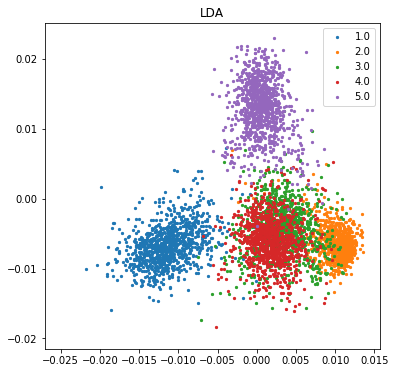

In [11]:
plt.figure(figsize=(6, 6))
plt.title("LDA")
for l in np.unique(label):
    plt.scatter(X_lda[np.where(label == l)][:, 0], X_lda[np.where(label == l)][:, 1], s=5, label=str(l))
    plt.legend()
# plt.savefig("LDA2.png")
plt.show()

# Face Reconstruct

In [12]:
import PIL
imgs = []
for i in range(40):
    for j in range(10):
        pic = PIL.Image.open('./att_faces/s{}/{}.pgm'.format(i+1, j+1))
        imgs.append(np.array(pic).reshape(-1))
imgs = np.array(imgs)
print(imgs.shape)

(400, 10304)


In [13]:
imgs

array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ...,
       [125, 119, 124, ...,  36,  39,  40],
       [119, 120, 120, ...,  89,  94,  85],
       [125, 124, 124, ...,  36,  35,  34]], dtype=uint8)

In [14]:
eigenface = myPCA(imgs.T, n_component=25)
eigenface = eigenface / np.linalg.norm(eigenface, axis=0)
print(eigenface.shape)
eigenface

(10304, 25)


array([[-0.00837344, -0.01248618,  0.01881755, ...,  0.01048953,
        -0.00271995,  0.00518574],
       [-0.00839009, -0.01243664,  0.01883255, ...,  0.00974882,
        -0.00197758,  0.0057063 ],
       [-0.00827368, -0.01246577,  0.01877995, ...,  0.01037806,
        -0.0025246 ,  0.0063196 ],
       ...,
       [-0.01285105, -0.00166376, -0.00997099, ...,  0.00242194,
        -0.01134842, -0.00122039],
       [-0.01305508, -0.00161541, -0.00836337, ...,  0.00460115,
        -0.00925658, -0.0052217 ],
       [-0.01328849, -0.00292062, -0.00794709, ..., -0.00146082,
        -0.00948866, -0.00590528]])

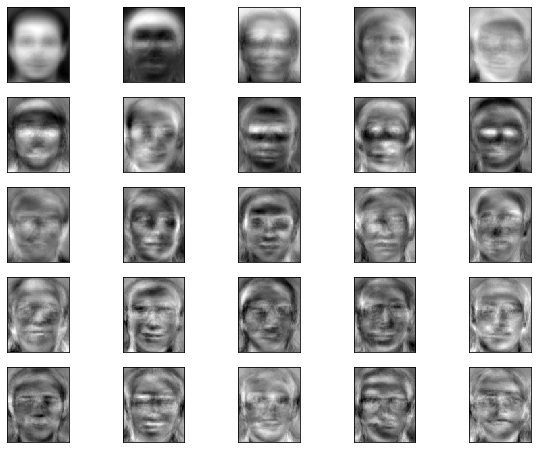

In [15]:
fig, ax = plt.subplots(5, 5, figsize=(10, 8))

for i in range(25):
    ax[int(i/5), i%5].imshow(eigenface.T[i].reshape(112, 92), cmap='gray')
    ax[int(i/5), i%5].get_xaxis().set_visible(False)
    ax[int(i/5), i%5].get_yaxis().set_visible(False)
plt.show()

In [16]:
def reconstruction(mean, eigenface, mu, image_index):
    weights = np.dot(mean, eigenface.T)
    centered_vector = np.dot(weights[image_index], eigenface)
    recovered_image = (mu + centered_vector).reshape(112, 92)
    return recovered_image

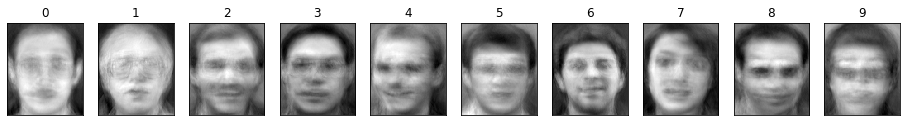

In [17]:
imgs_mean = imgs - np.mean(imgs, axis=0)
mean_face = np.mean(imgs, axis=0)
recovered_images=[reconstruction(imgs_mean, eigenface.T, mean_face, i*10) for i in range(10)]
fig, ax = plt.subplots(1, 10, figsize=(16, 4))
for n in range(len(recovered_images)):
    new_face = recovered_images[n]
    ax[n].imshow(new_face, cmap='gray')
    ax[n].set_title("{}".format(n))
    ax[n].get_xaxis().set_visible(False)
    ax[n].get_yaxis().set_visible(False)
plt.show()

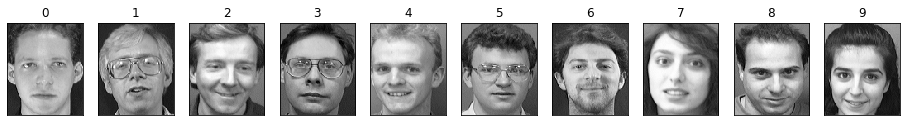

In [18]:
fig, ax = plt.subplots(1, 10, figsize=(16, 4))
plt.title("Original Face")
for n in range(10):
    original_face = imgs[n*10].reshape(112, 92)
    ax[n].imshow(original_face, cmap='gray')
    ax[n].set_title("{}".format(n))
    ax[n].get_xaxis().set_visible(False)
    ax[n].get_yaxis().set_visible(False)
plt.show()